# K-Nearest-Neighbors
KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting 
of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a
function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

# Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

# Problem statement

Dataset:
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald 
Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals.

Source: https://archive.ics.uci.edu/ml/datasets/Iris

Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

# Question 1
Import libraries and load the dataset

In [87]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("iris+%282%29.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(152, 6)

In [5]:
df.Species.value_counts(ascending=True)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     52
Name: Species, dtype: int64

# Data Pre-processing

# Question 2 - Estimating missing values
Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (mean or median).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             152 non-null    int64  
 1   SepalLengthCm  151 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   151 non-null    float64
 5   Species        152 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.drop(labels='Id',axis='columns',inplace=True)

<AxesSubplot:>

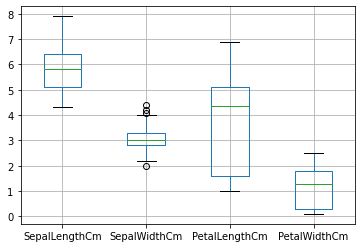

In [8]:
df.boxplot()

In [9]:
df.columns[df.isna().any()]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [10]:
df['SepalLengthCm'].count()

151

In [11]:
for column in df.columns[df.isna().any()]:
    print(column.upper (),':')
    print(df[column].unique())
    print('\n')
    

SEPALLENGTHCM :
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9 nan]


SEPALWIDTHCM :
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6 nan]


PETALLENGTHCM :
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2 nan]


PETALWIDTHCM :
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3 nan]




In [12]:
from sklearn.impute import SimpleImputer

In [13]:
SI_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
SI_median=SimpleImputer(missing_values=np.nan,strategy='median')

In [14]:
df['SepalLengthCm']= SI_mean.fit_transform(df[['SepalLengthCm']])
df['PetalLengthCm']=SI_mean.fit_transform(df[['PetalLengthCm']])
df['PetalWidthCm']=SI_mean.fit_transform(df[['PetalWidthCm']])

In [15]:
df['SepalWidthCm']= SI_median.fit_transform(df[['SepalWidthCm']])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  152 non-null    float64
 1   SepalWidthCm   152 non-null    float64
 2   PetalLengthCm  152 non-null    float64
 3   PetalWidthCm   152 non-null    float64
 4   Species        152 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


# Question 3 - Dealing with categorical data
Change all the classes to numericals (0to2) with the help of **pd.Categorical().codes** and drop ID as it is insignificant and does not contain any information

In [17]:
df['Species']=pd.Categorical(values=df['Species']).codes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  152 non-null    float64
 1   SepalWidthCm   152 non-null    float64
 2   PetalLengthCm  152 non-null    float64
 3   PetalWidthCm   152 non-null    float64
 4   Species        152 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 5.0 KB


In [19]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,6.500000,3.0,5.200000,2.000000,2
148,6.200000,3.4,5.400000,2.300000,2
149,5.900000,3.0,5.100000,1.800000,2
150,5.900000,3.0,3.758667,1.202649,2
151,5.843709,3.0,3.758667,1.800000,2


In [20]:
df.groupby(by='Species').count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
0,50,50,50,50
1,50,50,50,50
2,52,52,52,52


# Question 4
Observe the association of each independent variable with target variable by checking the .corr() and make a heatmap/correlation plot

<AxesSubplot:>

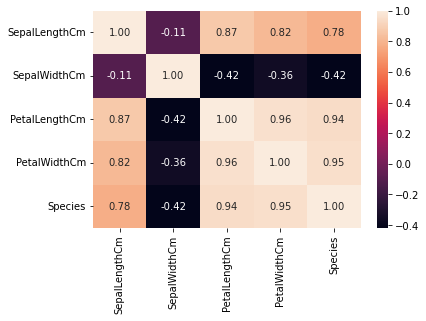

In [21]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

# Question 5
Observe the independent variables variance and check for variables having no variance or almost zero variance(variance < 0.1). 
They will be having almost no influence on the classification.

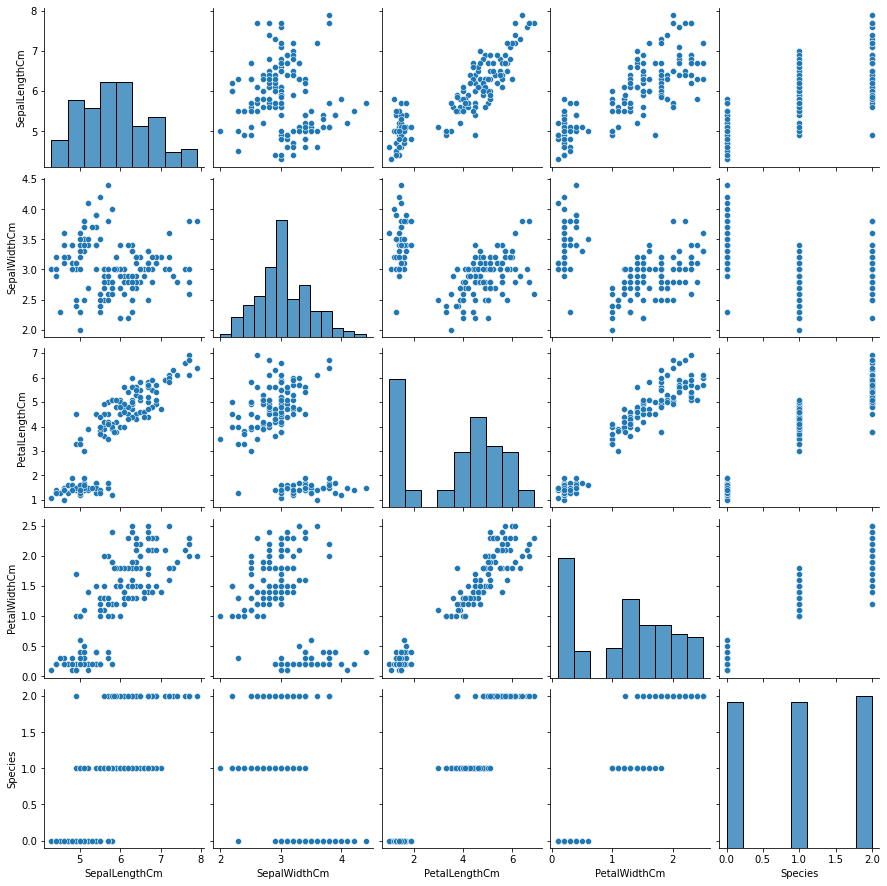

In [22]:
sns.pairplot(df)

# Question 6
Plot the pairplot with hue="Species for the data.

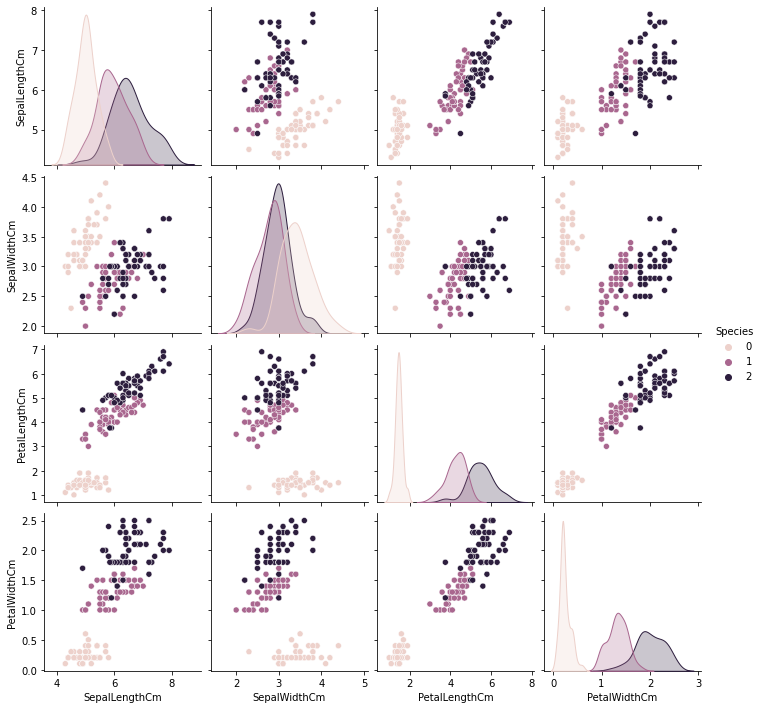

In [23]:
sns.pairplot(df,hue='Species')

# Question 7 Split the dataset into training and test sets
Split the dataset into training and test sets with 70-30 ratio.

In [24]:
X=df.drop('Species',axis='columns')
Y=df['Species']

In [25]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
147    2
148    2
149    2
150    2
151    2
Name: Species, Length: 152, dtype: int8

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [73]:
X_trains=X_train.apply(zscore)
X_tests=X_test.apply(zscore)

In [74]:
X_trains.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.060000e+02,1.060000e+02,1.060000e+02,1.060000e+02
mean,-7.122185e-16,-4.488024e-16,-2.806979e-16,-8.588518e-17
std,1.004751e+00,1.004751e+00,1.004751e+00,1.004751e+00
min,-1.766155e+00,-2.524816e+00,-1.522250e+00,-1.377943e+00
25%,-9.269941e-01,-5.854645e-01,-1.227613e+00,-1.249709e+00
50%,-2.995984e-02,-1.006267e-01,2.736320e-01,1.608653e-01
75%,6.645183e-01,5.660252e-01,7.787238e-01,8.020353e-01
max,2.400714e+00,3.293238e+00,1.788907e+00,1.699673e+00


# Question 8 - Model
Build the model. Print the Accuracy of the model with different values of k=3,5,9.

Hint: For accuracy use model.score()

In [77]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# initiantiate learning model (k = 3)
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')

# fitting the model
KNN_model.fit(X_trains,Y_train)

# predict the response
y_test_predict = KNN_model.predict(X_tests)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_tests, Y_test))

# initiantiate learning model (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

# fitting the model
KNN_model.fit(X_trains,Y_train)

# predict the responseedict(X_test)
y_test_predict = KNN_model.predict(X_tests)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_tests, Y_test))

# initiantiate learning model (k = 9)
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_trains,Y_train)

# predict the response
y_test_predict = KNN_model.predict(X_tests)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_tests, Y_test))

Accuracy Score for K=3 is  0.9347826086956522
Accuracy Score for K=5 is  0.9347826086956522
Accuracy Score for K=9 is  0.9565217391304348


# Question 9 - Optimal no. of K
Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis classification error

Hint:

Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the 
model with lowest MCE

In [86]:
acc_score=[]
for k in range(1,20,2):
    KNN_model=KNeighborsClassifier(n_neighbors = k,metric='euclidean')
    KNN_model.fit(X_trains,Y_train)
    scores=KNN_model.score(X_tests,Y_test)
    acc_score.append(scores)
    print("Accuracy Score for K={} is {}".format(k,KNN_model.score(X_tests, Y_test)))

MCE = [1-x for x in acc_score]
MCE

Accuracy Score for K=1 is 0.9782608695652174
Accuracy Score for K=3 is 0.9347826086956522
Accuracy Score for K=5 is 0.9347826086956522
Accuracy Score for K=7 is 0.9347826086956522
Accuracy Score for K=9 is 0.9565217391304348
Accuracy Score for K=11 is 0.9782608695652174
Accuracy Score for K=13 is 0.9565217391304348
Accuracy Score for K=15 is 0.9347826086956522
Accuracy Score for K=17 is 0.9347826086956522
Accuracy Score for K=19 is 0.9130434782608695


[0.021739130434782594,
 0.06521739130434778,
 0.06521739130434778,
 0.06521739130434778,
 0.04347826086956519,
 0.021739130434782594,
 0.04347826086956519,
 0.06521739130434778,
 0.06521739130434778,
 0.08695652173913049]

# Question 10
Plot misclassification error vs k (with k value on X-axis) using matplotlib.

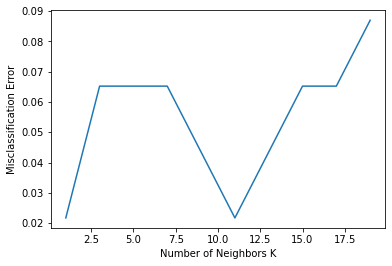

In [90]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()